In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
#Load the csv file
df=pd.read_csv("/content/drive/My Drive/FuelConsumption.csv")
print(df.head(10))

   MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244
5       2014  ACURA  ...                       28          230
6       2014  ACURA  ...                       28          232
7       2014  ACURA  ...                       25          255
8       2014  ACURA  ...                       24          267
9       2014  ACURA  ...                       31          212

[10 rows x 13 columns]


In [3]:
#Columns in the datatset
print(df.columns)

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


In [4]:
#checking the data types of each column
print(df.dtypes)

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object


In [9]:
df.describe(include="all")

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV 4X4,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [11]:
#check for NaN value in each column
for col in df.columns:
  print(df[col].isnull().value_counts())

False    1067
Name: MODELYEAR, dtype: int64
False    1067
Name: MAKE, dtype: int64
False    1067
Name: MODEL, dtype: int64
False    1067
Name: VEHICLECLASS, dtype: int64
False    1067
Name: ENGINESIZE, dtype: int64
False    1067
Name: CYLINDERS, dtype: int64
False    1067
Name: TRANSMISSION, dtype: int64
False    1067
Name: FUELTYPE, dtype: int64
False    1067
Name: FUELCONSUMPTION_CITY, dtype: int64
False    1067
Name: FUELCONSUMPTION_HWY, dtype: int64
False    1067
Name: FUELCONSUMPTION_COMB, dtype: int64
False    1067
Name: FUELCONSUMPTION_COMB_MPG, dtype: int64
False    1067
Name: CO2EMISSIONS, dtype: int64


In [12]:
df["FUELTYPE"].value_counts() #This a categorical value

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [0]:
#we make a new dataset with columns which may be useful in predicting the CO2 emmission
new_df=df[["ENGINESIZE","CYLINDERS","FUELTYPE","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

In [14]:
new_df.head(10)

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,Z,8.5,196
1,2.4,4,Z,9.6,221
2,1.5,4,Z,5.9,136
3,3.5,6,Z,11.1,255
4,3.5,6,Z,10.6,244
5,3.5,6,Z,10.0,230
6,3.5,6,Z,10.1,232
7,3.7,6,Z,11.1,255
8,3.7,6,Z,11.6,267
9,2.4,4,Z,9.2,212


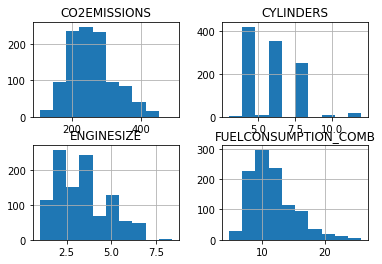

In [15]:
#how the values in each column is distributed can be visualized by generating a histogram
new_df.hist()
plt.show()

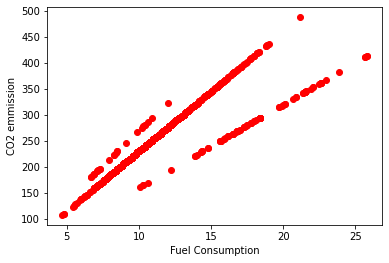

In [17]:
#relation between FUELCONSUMPTION_COMB and CO2 emmission
plt.scatter(new_df.FUELCONSUMPTION_COMB,new_df.CO2EMISSIONS,color = "red")
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 emmission")
plt.show()

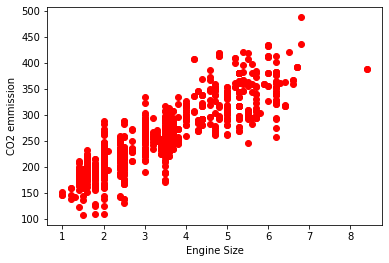

In [18]:
#relation between ENGINESIZE and CO2 emmission
plt.scatter(new_df.ENGINESIZE,new_df.CO2EMISSIONS,color = "red")
plt.xlabel("Engine Size")
plt.ylabel("CO2 emmission")
plt.show()

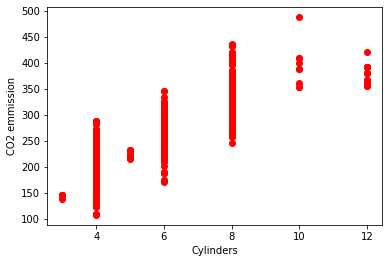

In [19]:
#relation between CYLINDERS and CO2 emmission
plt.scatter(new_df.CYLINDERS,new_df.CO2EMISSIONS,color = "red")
plt.xlabel("Cylinders")
plt.ylabel("CO2 emmission")
plt.show()

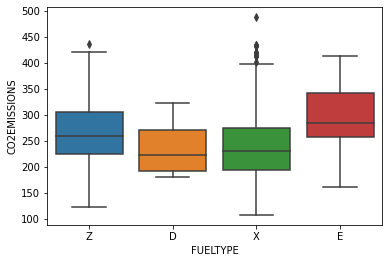

In [21]:
#this boxplot helps us to view which type has most impact on the co2 emmission, here it is almost equal for each type
sns.boxplot(x = new_df.FUELTYPE,y = new_df.CO2EMISSIONS)

In [22]:
#Seperating target and predictor variables
X_data = new_df.drop(["CO2EMISSIONS"],axis = 1)
X_data.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_COMB
0,2.0,4,Z,8.5
1,2.4,4,Z,9.6
2,1.5,4,Z,5.9
3,3.5,6,Z,11.1
4,3.5,6,Z,10.6


In [23]:
Y_data = new_df[["CO2EMISSIONS"]]
Y_data.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [24]:
#From above plots we can see that ENGINESIZE shows a linear relationship with CO2EMISSIONS hence,
X_data = X_data[["ENGINESIZE"]]
X_data.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [0]:
#Split the dataset for training and testing
train_x,test_x,train_y,test_y = train_test_split(X_data,Y_data,test_size = 0.4,random_state=4)


In [27]:
print(train_x.size)
print(train_y.size)
print(test_x.size)
print(test_y.size)

640
640
427
427


In [0]:
LinearRegression = linear_model.LinearRegression()

In [29]:
LinearRegression.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print("Coefficient: {}".format(LinearRegression.coef_))
print("Intercept: {}".format(LinearRegression.intercept_))

Coefficient: [[39.33265384]]
Intercept: [124.92049167]


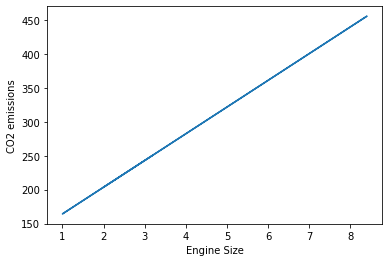

In [38]:
plt.plot(X_data,39.33265384*X_data + 124.92049167)
plt.xlabel("Engine Size")
plt.ylabel("CO2 emissions")
plt.show()

In [0]:
  y_pred = LinearRegression.predict(test_x)

In [35]:
#Evaluating model performance by calculating different errors
print("MSE: {}".format(metrics.mean_squared_error(test_y,y_pred)))

print("R squared value: {}".format(metrics.r2_score(test_y,y_pred)))



MSE: 832.8531266541058
R squared value: 0.7888816987149243
